In [49]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'figure.dpi': 200})
mpl.rcParams.update({'figure.figsize': (6,4)})
import pandas as pd
import seaborn as sns
import warnings

import glob
from collections import defaultdict
import scipy as sp
from scipy import special
from itertools import product

from scipy.io import savemat
from typing import Optional

from matplotlib.collections import PatchCollection

import os

In [51]:
# make movie from traj file
def make_pretty_configs(file_path: str):

    fig, axs = plt.subplots(1, 2, figsize=(16,8))

    data_files = glob.glob(os.path.join(file_path, "*hertz*"))
    data_files.extend(glob.glob(os.path.join(file_path, "*lj*")))

    for i, label in enumerate(('a', 'b')):
        ax = axs[i]
        ax.text(0.0,1.05,f"({label})",transform=ax.transAxes)

    for ax, f_str in zip(axs, data_files):
        with open(f_str, "r") as f: 
            data = json.load(f)
            types = data["types"]
            box = data["b"][:2]
            box_h = data["bh"][:2]
            if data["potential"] == "LJ":
                colors = ["#ffb5b5", "#ff6666"]
                sigmas = data["sigmas"]
                sigmas = np.array([sigmas[0], sigmas[2]])*.5
            else:
                colors = ["#66a8ff", "#b5d5ff"]
                sigmas = np.array(data["sigmas"])
            plt.sca(ax)
            patches = []
            dxs = np.array([[0,0],[0,1],[1,0],[1,1],[0,-1],[-1,0],[-1,-1],[1,-1],[-1,1]])
            for xt, t in zip(np.array(data["x"]), types):
                c = colors[t]
                r = sigmas[t]
                for i, dx in enumerate(dxs):
                    # if i == 0:
                    #     alph=.85
                    # else:
                    alph=.75
                    x = xt[:2] + dx*box
                    patches.append(mpatches.Circle(x, r, color=c, alpha=alph))
            buffer = 1.3
            plt.ylim(-box_h[1]*buffer, box_h[1]*buffer)
            plt.xlim(-box_h[0]*buffer, box_h[0]*buffer)
            collection = PatchCollection(patches, match_original=True)

            ax.add_collection(collection)
            # Create a Rectangle patch
            rect = mpatches.Rectangle((-box_h[0], box_h[1]), box[0], -box[1], linestyle="--", linewidth=1, edgecolor='k', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)
            ax.set_aspect('equal', adjustable='box')
            ax.axis('off')
        # fig.patch.set_visible(False)


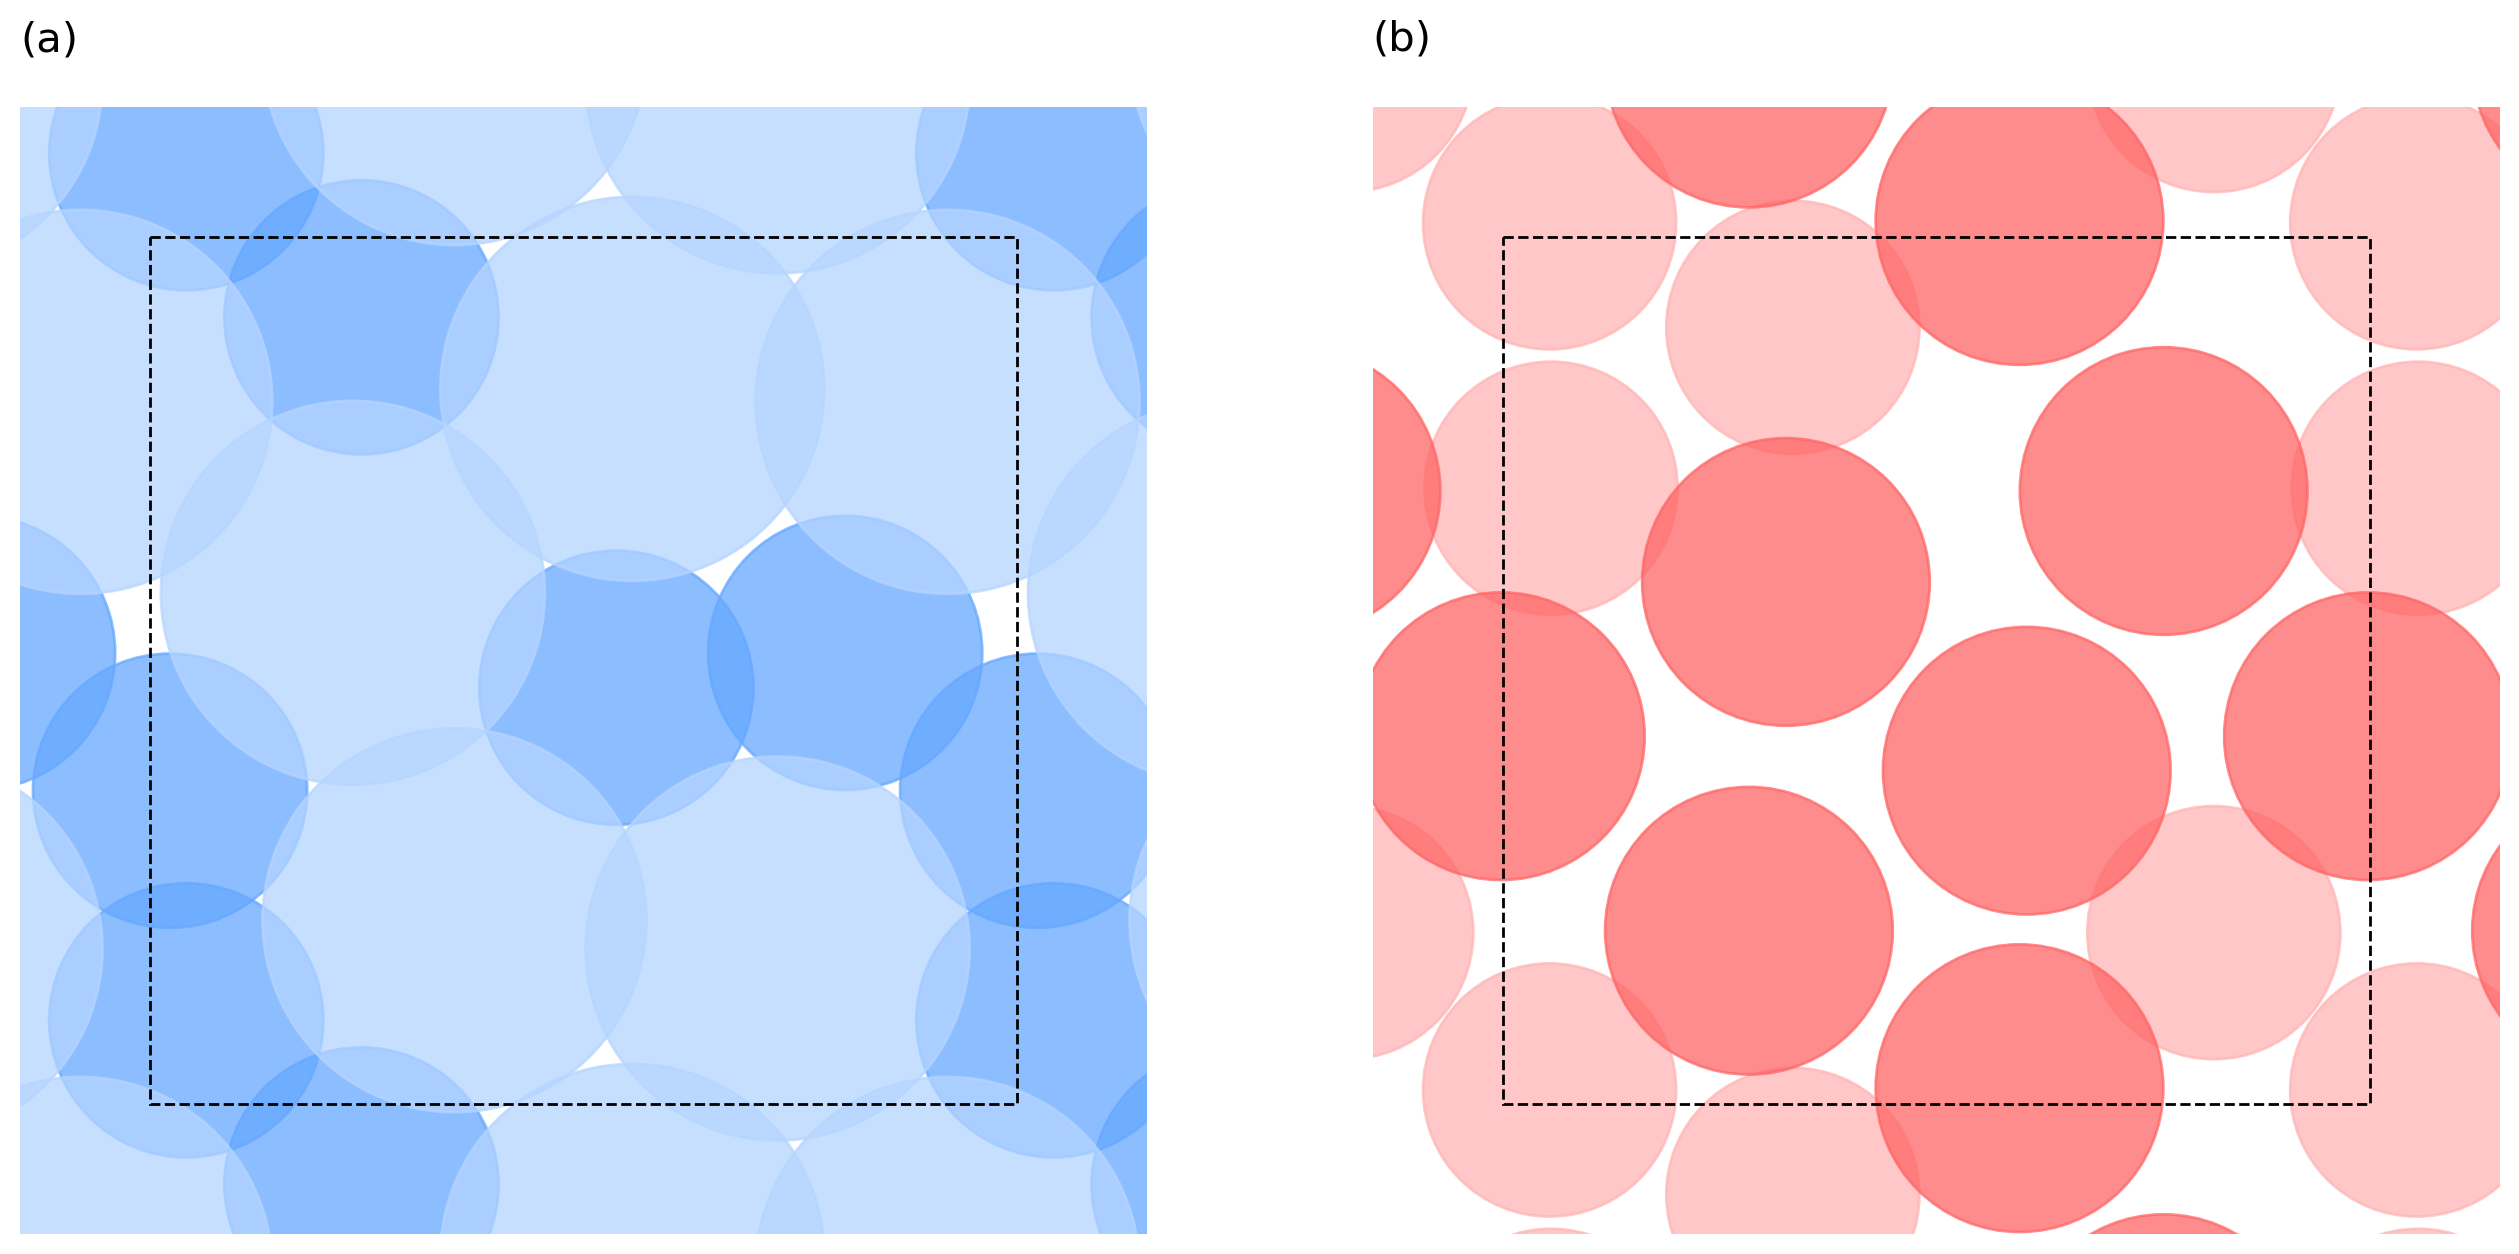

In [52]:
file_path = "/home/ian/Documents/Data/MD_LV_paper_data/paper_inits/"
make_pretty_configs(file_path)